# Introduction

In this notebook, we set out to assess whether the CDR loops of TCRs stay in there canonical forms between *apo* and *holo* states or if they disrupt them.

In [1]:
import itertools

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/stcrdab_clusters.csv')
df

,name,cluster,chain_type,cdr,sequence,cluster_type
0,7zt2_DE,12,alpha_chain,1,TSGFNG,pseudo
1,7zt3_DE,12,alpha_chain,1,TSGFNG,pseudo
2,7zt4_DE,12,alpha_chain,1,TSGFNG,pseudo
3,7zt5_DE,12,alpha_chain,1,TSGFNG,pseudo
4,7zt7_DE,12,alpha_chain,1,TSGFNG,pseudo
...,...,...,...,...,...,...
4807,6miv_CD,22,beta_chain,3,ASGDEGYTQY,canonical
4808,3rtq_CD,22,beta_chain,3,ASGDEGYTQY,canonical
4809,3dxa_NO,noise,beta_chain,3,ASRYRDDSYNEQF,NaN
4810,1d9k_AB,noise,beta_chain,3,ASGGQGRAEQF,NaN


# Compare *apo* and *holo* forms of loops

In [3]:
apo_holo_summary_df = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')
apo_holo_summary_df

,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug
0,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01
1,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01
2,1bii_A-B-P_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
3,1ddh_A-B-P_pmhc.pdb,1ddh,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
4,1duz_A-B-C_pmhc.pdb,1duz,pmhc,apo,NaN,NaN,C,A,B,NaN,LLFGYPVYV,hla_a_02_01
...,...,...,...,...,...,...,...,...,...,...,...,...
353,8gon_D-E-C-A-B_tcr_pmhc.pdb,8gon,tcr_pmhc,holo,D,E,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
354,8gop_A-B_tcr.pdb,8gop,tcr,apo,A,B,NaN,NaN,NaN,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
355,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02
356,8gvg_A-B-P-H-L_tcr_pmhc.pdb,8gvg,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RFPLTFGW,hla_a_24_02


In [4]:
df[['pdb_id', 'chains']] = df['name'].str.split('_').apply(pd.Series)
df[['alpha_chain', 'beta_chain']] = df['chains'].apply(list).apply(pd.Series)

In [5]:
apo_holo_clusters = df.merge(apo_holo_summary_df,
                             how='inner',
                             on=['pdb_id', 'alpha_chain', 'beta_chain'])
apo_holo_clusters

,name,cluster,chain_type,cdr,sequence,cluster_type,pdb_id,chains,alpha_chain,beta_chain,file_name,structure_type,state,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug
0,8gom_DE,4,alpha_chain,1,TSESDYY,canonical,8gom,DE,D,E,8gom_D-E-C-A-B_tcr_pmhc.pdb,tcr_pmhc,holo,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
1,8gom_DE,4,beta_chain,1,SGHNS,canonical,8gom,DE,D,E,8gom_D-E-C-A-B_tcr_pmhc.pdb,tcr_pmhc,holo,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
2,8gom_DE,3,alpha_chain,2,QEAYKQQN,canonical,8gom,DE,D,E,8gom_D-E-C-A-B_tcr_pmhc.pdb,tcr_pmhc,holo,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
3,8gom_DE,2,beta_chain,2,FNNNVP,canonical,8gom,DE,D,E,8gom_D-E-C-A-B_tcr_pmhc.pdb,tcr_pmhc,holo,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
4,8gom_DE,noise,alpha_chain,3,ASSGNTPLV,NaN,8gom,DE,D,E,8gom_D-E-C-A-B_tcr_pmhc.pdb,tcr_pmhc,holo,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,3dxa_NO,4,beta_chain,1,SEHNR,canonical,3dxa,NO,N,O,3dxa_N-O-M-K-L_tcr_pmhc.pdb,tcr_pmhc,holo,M,K,L,TISGNEY-GLKNN-IVWGGYQKVT-SEHNR-FQNEAQ-ASRYRDDS...,NaN,NaN
1190,3dxa_NO,noise,alpha_chain,2,GLKNN,NaN,3dxa,NO,N,O,3dxa_N-O-M-K-L_tcr_pmhc.pdb,tcr_pmhc,holo,M,K,L,TISGNEY-GLKNN-IVWGGYQKVT-SEHNR-FQNEAQ-ASRYRDDS...,NaN,NaN
1191,3dxa_NO,2,beta_chain,2,FQNEAQ,canonical,3dxa,NO,N,O,3dxa_N-O-M-K-L_tcr_pmhc.pdb,tcr_pmhc,holo,M,K,L,TISGNEY-GLKNN-IVWGGYQKVT-SEHNR-FQNEAQ-ASRYRDDS...,NaN,NaN
1192,3dxa_NO,6,alpha_chain,3,IVWGGYQKVT,canonical,3dxa,NO,N,O,3dxa_N-O-M-K-L_tcr_pmhc.pdb,tcr_pmhc,holo,M,K,L,TISGNEY-GLKNN-IVWGGYQKVT-SEHNR-FQNEAQ-ASRYRDDS...,NaN,NaN


In [6]:
def collate_clusters(group):
    apo_clusters = sorted(group.query("state == 'apo'")['cluster'].tolist())
    holo_clusters = sorted(group.query("state == 'holo'")['cluster'].tolist())

    return pd.Series({'apo_clusters': apo_clusters, 'holo_clusters': holo_clusters})

apo_holo_clusters_agg = apo_holo_clusters.groupby(['cdr_sequences_collated',
                                                   'chain_type',
                                                   'cdr']).apply(collate_clusters).reset_index()
apo_holo_clusters_agg

,cdr_sequences_collated,chain_type,cdr,apo_clusters,holo_clusters
0,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,[13],"[noise, noise]"
1,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,2,[noise],"[noise, noise]"
2,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,3,[noise],"[noise, noise]"
3,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,beta_chain,1,[4],"[4, 4]"
4,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,beta_chain,2,[2],"[2, 2]"
...,...,...,...,...,...
385,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,alpha_chain,2,[noise],[noise]
386,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,alpha_chain,3,[noise],[2]
387,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,1,[4],[4]
388,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,2,[2],[2]


In [7]:
cluster_types = (df[['chain_type', 'cdr', 'cluster', 'cluster_type']].drop_duplicates()
                                                                     .set_index(['chain_type', 'cdr', 'cluster'])
                                                                     ['cluster_type'])

In [8]:
def classify_movement(chain_type: str,
                      cdr: str,
                      apo_clusters: list[str],
                      holo_clusters: list[str],
                      cluster_types: pd.Series) -> pd.Series:
    types = {
        'Noise': 0,
        'Noise to Canonical Cluster': 0,
        'Noise to Pseudo Cluster': 0,
        'Canonical Cluster to Noise': 0,
        'Pseudo Cluster to Noise': 0,
        'Canonical Cluster Shift': 0,
        'Pseudo Cluster Shift': 0,
        'Canonical to Pseudo': 0,
        'Pseudo to Canonical': 0,
        'Canonical Cluster Same': 0,
        'Pseudo Cluster Same': 0,
    }

    for apo_clust, holo_clust in itertools.product(apo_clusters, holo_clusters):
        if apo_clust == 'noise' and holo_clust == 'noise':
            types['Noise'] += 1

        elif apo_clust == 'noise' and holo_clust != 'noise':
            if cluster_types.loc[chain_type, cdr, holo_clust] == 'canonical':
                 types['Noise to Canonical Cluster'] += 1

            else:
                types['Noise to Pseudo Cluster'] += 1

        elif apo_clust != 'noise' and holo_clust == 'noise':
            if cluster_types.loc[chain_type, cdr, apo_clust] == 'canonical':
                 types['Canonical Cluster to Noise'] += 1

            else:
                types['Pseudo Cluster to Noise'] += 1

        elif apo_clust != holo_clust:
            if (cluster_types.loc[chain_type, cdr, apo_clust]
                == cluster_types.loc[chain_type, cdr, holo_clust]
                == 'canonical'):
                 types['Canonical Cluster Shift'] += 1

            elif (cluster_types.loc[chain_type, cdr, apo_clust] == 'canonical'
                  and cluster_types.loc[chain_type, cdr, holo_clust] == 'pseudo'):
                types['Canonical to Pseudo'] += 1

            else:
                types['Pseudo to Canonical'] += 1

        elif apo_clust == holo_clust:
            if cluster_types.loc[chain_type, cdr, apo_clust] == 'canonical':
                types['Canonical Cluster Same'] += 1

            else:
                types['Pseudo Cluster Same'] += 1

    return pd.Series(types)


apo_holo_clusters_agg = apo_holo_clusters_agg.join(apo_holo_clusters_agg.apply(
    lambda row: classify_movement(row.chain_type, row.cdr, row.apo_clusters, row.holo_clusters, cluster_types), axis=1
))

# Wide to long
apo_holo_clusters_agg = apo_holo_clusters_agg.melt(id_vars=['cdr_sequences_collated', 'chain_type', 'cdr'],
                                                 value_vars=['Noise',
                                                             'Noise to Canonical Cluster',
                                                             'Noise to Pseudo Cluster',
                                                             'Canonical Cluster to Noise',
                                                             'Pseudo Cluster to Noise',
                                                             'Canonical Cluster Shift',
                                                             'Pseudo Cluster Shift',
                                                             'Canonical to Pseudo',
                                                             'Pseudo to Canonical',
                                                             'Canonical Cluster Same',
                                                             'Pseudo Cluster Same'],
                                                 var_name='types', value_name='count')

# Normalize for differeing group sizes
apo_holo_clusters_agg = apo_holo_clusters_agg.groupby(
    ['cdr_sequences_collated', 'chain_type', 'cdr', 'types'],
)['count'].median().reset_index()
apo_holo_clusters_agg

,cdr_sequences_collated,chain_type,cdr,types,count
0,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Canonical Cluster Same,0.0
1,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Canonical Cluster Shift,0.0
2,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Canonical Cluster to Noise,2.0
3,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Canonical to Pseudo,0.0
4,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Noise,0.0
...,...,...,...,...,...
4285,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,3,Noise to Pseudo Cluster,0.0
4286,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,3,Pseudo Cluster Same,0.0
4287,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,3,Pseudo Cluster Shift,0.0
4288,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,3,Pseudo Cluster to Noise,0.0


In [9]:
apo_holo_clusters_agg

,cdr_sequences_collated,chain_type,cdr,types,count
0,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Canonical Cluster Same,0.0
1,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Canonical Cluster Shift,0.0
2,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Canonical Cluster to Noise,2.0
3,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Canonical to Pseudo,0.0
4,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,alpha_chain,1,Noise,0.0
...,...,...,...,...,...
4285,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,3,Noise to Pseudo Cluster,0.0
4286,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,3,Pseudo Cluster Same,0.0
4287,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,3,Pseudo Cluster Shift,0.0
4288,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,beta_chain,3,Pseudo Cluster to Noise,0.0


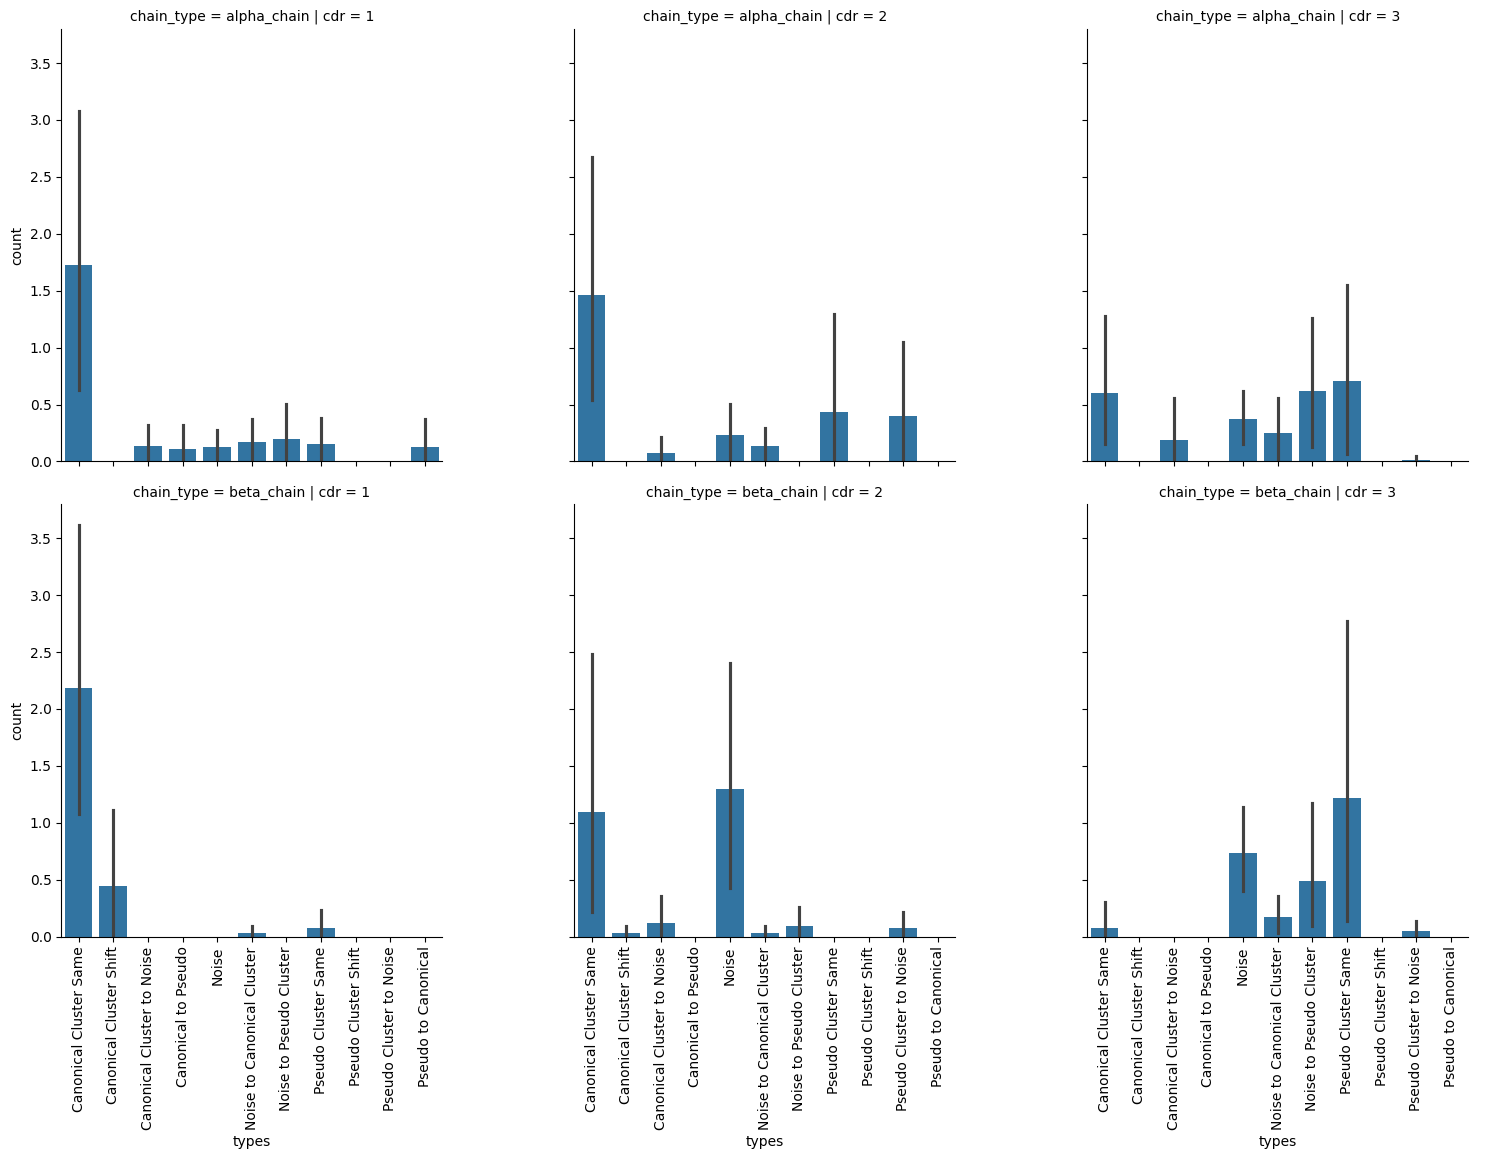

In [10]:
g = sns.catplot(apo_holo_clusters_agg.sort_values(['chain_type', 'cdr', 'types']),
                row='chain_type', col='cdr',
                x='types', y='count',
                kind='bar')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90)

plt.savefig('../report/figures/apo_holo_cluster_changes.svg')

In [11]:
cluster_shift_counts = apo_holo_clusters_agg.groupby(['chain_type', 'cdr', 'types'])['count'].sum().astype(int)
cluster_shift_counts[cluster_shift_counts > 0]

chain_type   cdr  types                     
alpha_chain  1    Canonical Cluster Same        112
                  Canonical Cluster to Noise      9
                  Canonical to Pseudo             7
                  Noise                           8
                  Noise to Canonical Cluster     11
                  Noise to Pseudo Cluster        13
                  Pseudo Cluster Same            10
                  Pseudo to Canonical             8
             2    Canonical Cluster Same         95
                  Canonical Cluster to Noise      5
                  Noise                          15
                  Noise to Canonical Cluster      9
                  Pseudo Cluster Same            28
                  Pseudo Cluster to Noise        26
             3    Canonical Cluster Same         39
                  Canonical Cluster to Noise     12
                  Noise                          24
                  Noise to Canonical Cluster     16
                  N

In [12]:
export_cluster_shift_counts = cluster_shift_counts.to_frame().reset_index()

export_cluster_shift_counts = export_cluster_shift_counts.rename({'types': 'Movement Type'}, axis='columns')

export_cluster_shift_counts['CDR Type'] = export_cluster_shift_counts.apply(
    lambda row: f"CDR{row.cdr}\\text{row.chain_type.split('_')[0]}{{}}",
    axis='columns',
)

export_cluster_shift_counts = export_cluster_shift_counts.pivot(index='Movement Type',
                                                                columns='CDR Type',
                                                                values='count')
export_cluster_shift_counts = export_cluster_shift_counts.sort_values('Movement Type')

export_cluster_shift_counts = export_cluster_shift_counts.replace(0, '-')
export_cluster_shift_counts = export_cluster_shift_counts.sort_index()
export_cluster_shift_counts.columns.name = None
export_cluster_shift_counts = export_cluster_shift_counts.reset_index()

with open('../report/cluster_changes.tex', 'w') as fh:
    fh.write(export_cluster_shift_counts.to_latex(escape=False, index=False))

export_cluster_shift_counts

/var/scratch/bmcmaste/1908294/ipykernel_260472/2849749015.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  fh.write(export_cluster_shift_counts.to_latex(escape=False, index=False))


,Movement Type,CDR1\textalpha{},CDR1\textbeta{},CDR2\textalpha{},CDR2\textbeta{},CDR3\textalpha{},CDR3\textbeta{}
0,Canonical Cluster Same,112,142,95,71,39,5
1,Canonical Cluster Shift,-,29,-,2,-,-
2,Canonical Cluster to Noise,9,-,5,8,12,-
3,Canonical to Pseudo,7,-,-,-,-,-
4,Noise,8,-,15,84,24,48
5,Noise to Canonical Cluster,11,2,9,2,16,11
6,Noise to Pseudo Cluster,13,-,-,6,40,32
7,Pseudo Cluster Same,10,5,28,-,46,79
8,Pseudo Cluster Shift,-,-,-,-,-,-
9,Pseudo Cluster to Noise,-,-,26,5,1,3


# Conclusion

The analysis here shows that for the most part, the CDR-1s and CDR-2s stay in their canonical forms between *apo* and *holo* states where as the CDR-3 loops have a variety of modes.
As expected, it is more difficult to cluster the CDR-3 loops as they are more structurally diverse.